# Introductory applied machine learning
# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [15]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [16]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path, delimiter = ',')
news_raw.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


(2) ***Your answer goes here:**

min, 25%, 50% and 75% values are very small, but max values are all very big.

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [18]:
# (1) # Your Code goes here:
news_raw.columns

Index(['w1_aaa', 'w2_pins', 'w3_kmr', 'w4_notion', 'w5_queens', 'w6_dwyer',
       'w7_defenseman', 'w8_gld', 'w9_tocchet', 'w10_home',
       ...
       'w512_constantly', 'w513_generate', 'w514_definite', 'w515_lacks',
       'w516_combination', 'w517_sitting', 'w518_surface', 'w519_fashion',
       'w520_sit', 'class'],
      dtype='object', length=521)

(2) ***Your answer goes here:***

The key features are 512 words which appear in newsgroups and their class.

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for the raw dataset. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency to better visualise your model). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 
 ***N.B.*** *If for some reason, the alpha parameter does not work for you, then ignore it.*

1. [Text] Mention anything peculiar you observe in the Data.

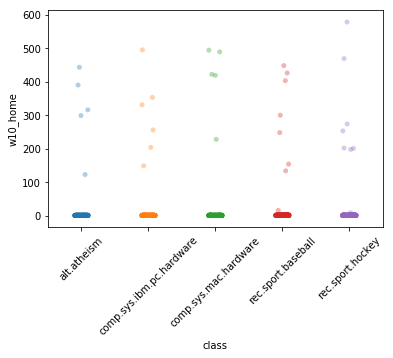

In [19]:
# (1) # Your Code goes here:
ax =  sns.stripplot(x="class", y="w10_home", data=news_raw, jitter=True, alpha=0.35)
labels = ['alt.atheism','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.sport.baseball','rec.sport.hockey']
ax.set_xticklabels(labels, rotation=45)
plt.show()

(2) ***Your answer goes here:***

Most data are near 0, and only a few points are in the range from 100 to 600.

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from `news_raw` and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

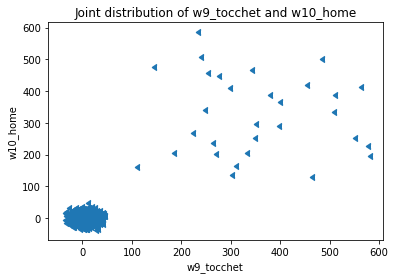

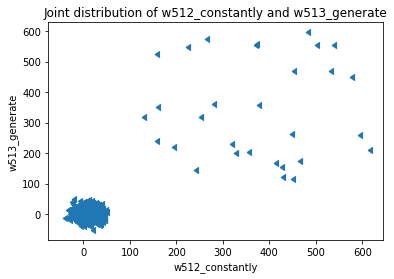

In [20]:
# (1) # Your Code goes here:
scatter_jitter(news_raw["w9_tocchet"], news_raw["w10_home"], jitter=0.3)
plt.title("Joint distribution of w9_tocchet and w10_home")
plt.xlabel("w9_tocchet")
plt.ylabel("w10_home")
plt.show()

#another pair of attributes
scatter_jitter(news_raw["w512_constantly"], news_raw["w513_generate"], jitter=0.3)
plt.title("Joint distribution of w512_constantly and w513_generate")
plt.xlabel("w512_constantly")
plt.ylabel("w513_generate")
plt.show()

(2) ***Your answer goes here:***

No. The input and the output are all the points from the attributes including all inliers and outliers. I think we should process data and filter out outliers first and then generate a plot.

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of documents in the cleaned dataset, and the number rejected as outliers and comment on the result

(1) ***Your answer goes here:***

From the picture in Q1.3, we can find that most of values are just a little bit larger than 0. According to the normal distribution, the area (data) of 95.45% is within the range of two standard deviations of the average. So according to this normal distribution model, the outliers can be removed. So  I decide to set the criterion as (2 * std +/- mean). In addition, the mean values are smaller than std values, so I expand the range of normal value, which is (0, 2 * std + mean). Values beyond that will be regarded as outliers.

In [21]:
# (2) # Your Code goes here:

news_clean = news_raw.copy()
news_clean["outlier"] = 0

# Find outliers
for column in news_clean:
    if column == "outlier":
        break
    meana = news_clean[column].mean()
    stda = news_clean[column].std()
    # Mark the value over mean + 2*std or below 1 (regard it as outlier)
    for i in range(len(news_clean[column])):
        if (news_clean[column].iloc[i] > meana + 2*stda) or (news_clean[column].iloc[i] <1):
            news_clean["outlier"].iloc[i] = 1

news_clean = news_clean[news_clean["outlier"] < 1]
news_clean = news_clean.drop("outlier", axis=1, inplace=False)
news_clean

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1
7,1,1,1,1,1,1,1,1,1,1,...,2,8,6,2,3,7,8,2,5,3
8,1,1,1,1,1,1,1,1,1,1,...,5,3,7,8,1,2,3,2,6,5
9,1,1,1,1,1,1,1,1,1,1,...,3,7,2,4,1,2,5,7,1,1


(3) ***Your answer goes here:***

There are 2091 points and 38 (2129 - 2091) outliers in the cleaned dataset. Due to the large standard deviation and deviation, using this model may result in some outliers not being removed (From the picture in Q1.3 we can find that some outliers' values are near 100). But with this model it is already possible to remove most of the noise.

### ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

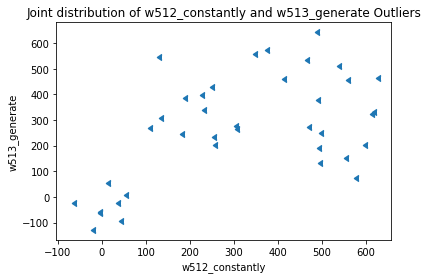

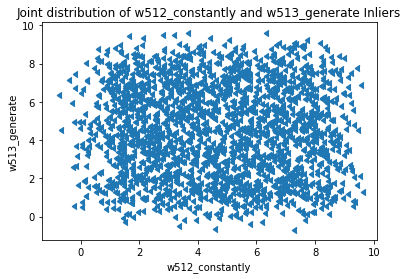

In [22]:
# (1) # Your Code goes here:

#Outlier ones
news_del = news_raw.copy()
news_del["outlier"] = 0
for column in news_del:
    if column == "outlier":
        break
    meana = news_del[column].mean()
    stda = news_del[column].std()
    # Mark the value over mean + 2*std or below 1 (regard it as outlier)
    for i in range(len(news_del[column])):
        if (news_del[column].iloc[i] > meana + 2*stda) or (news_del[column].iloc[i] <1):
            news_del["outlier"].iloc[i] = 1

news_del = news_del[news_del["outlier"] == 1]
news_del = news_del.drop("outlier", axis=1, inplace=False)

#Outlier ones (output)

scatter_jitter(news_del["w512_constantly"], news_del["w513_generate"], jitter=0.3)
plt.title("Joint distribution of w512_constantly and w513_generate Outliers")
plt.xlabel("w512_constantly")
plt.ylabel("w513_generate")
plt.show()

#Inlier ones (output)
scatter_jitter(news_clean["w512_constantly"], news_clean["w513_generate"], jitter=0.3)
plt.title("Joint distribution of w512_constantly and w513_generate Inliers")
plt.xlabel("w512_constantly")
plt.ylabel("w513_generate")
plt.show()


(2) ***Your answer goes here:***

The outliers and the inliers are better distinguished. It can be seen that the effective data of the joint distribution is reduced from (0, 600) to (0, 10). i think it is appropriate to do such cleaning, but not appropriate to do all cleaning.

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [23]:
# Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(data_path, delimiter = ',')

data_path = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(data_path, delimiter = ',')

print (news_train.describe())
print ("#####################")
print (news_test.describe())

            w1_aaa      w2_pins       w3_kmr    w4_notion    w5_queens  \
count  2099.000000  2099.000000  2099.000000  2099.000000  2099.000000   
mean      1.025727     1.017627     1.014769     1.008576     1.006193   
std       0.280109     0.205208     0.172657     0.115206     0.078473   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     1.000000     1.000000     1.000000     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       8.000000     7.000000     5.000000     4.000000     2.000000   

          w6_dwyer  w7_defenseman       w8_gld   w9_tocchet     w10_home  \
count  2099.000000    2099.000000  2099.000000  2099.000000  2099.000000   
mean      1.010481       1.026203     1.024297     1.012387     1.084326   
std       0.134174       0.618880     0.274219     0.153879     0.491139   
min       1.000000       1.00

### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***
1.  Attributes are conditionally independent of each other given a target value.

- The relationship between attributes that are not conditionally independent cannot be obtained, and the joint probability cannot be calculated.


### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

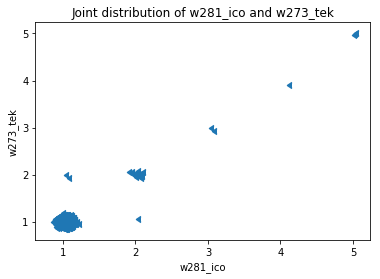

In [24]:
# (1) # Your Code goes here:
scatter_jitter(news_clean["w281_ico"], news_clean["w273_tek"], jitter=0.25)
plt.title("Joint distribution of w281_ico and w273_tek")
plt.xlabel("w281_ico")
plt.ylabel("w273_tek")
plt.show()

(2) ***Your answer goes here:***

There is a linear relationship between the two attributes except some points, which means that w281 and w273 are not independant with each other. This will impact the validity of the Naive Bayes assumption because Naive Bayes assumes that attributes are conditionally independent of each other.

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***

The probability that the most occurrences occur is greater, so we can divide the maximum by the sum to get the baseline.

In [50]:
# (2) # Your Code goes here:
count_train = news_train.groupby("class").count()
#count_train through this we know the max is class 4
print ("Baseline performance: ",count_train["w10_home"].max()/count_train["w10_home"].sum())

Baseline performance:  0.21295855169128156


<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [31]:
# (1) # Your Code goes here:
# Your code goes here
gnb = GaussianNB()
X = news_train.drop("class", axis=1)
y = news_train["class"]
gnb.fit(X=X, y=y)

GaussianNB(priors=None)

Classification accuracy on training data: 0.8780371605526441
______________________________________________________


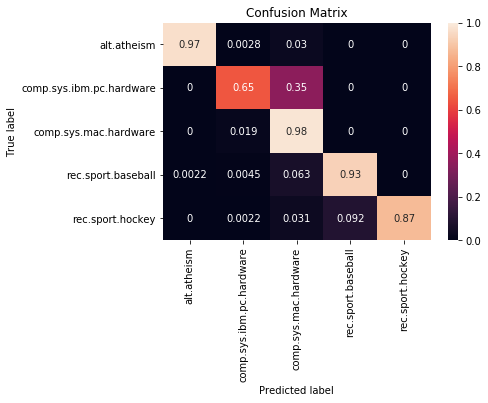

In [32]:
# (2) # Your Code goes here:
print ("Classification accuracy on training data:", gnb.score(X, y))
print ("______________________________________________________")

tr_pred = gnb.predict(X=X)
cm = confusion_matrix(y, tr_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plot_confusion_matrix from lab2_Q8
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm_norm, labels, title="Confusion Matrix")

(3) ***Your answer goes here:***

This model performs well. The accuracy a reasonable metric to use for this dataset because it (0.878) is very closed to the average of values along the main diagonal (0.88).

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***

The confusion matrix is expected because the average of values along the main diagonal (0.88) is very closed to the accuracy (0.878). # I actually do not know the difference between 2.5.3 and 2.6.

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

Classification accuracy on test data: 0.96875
______________________________________________________


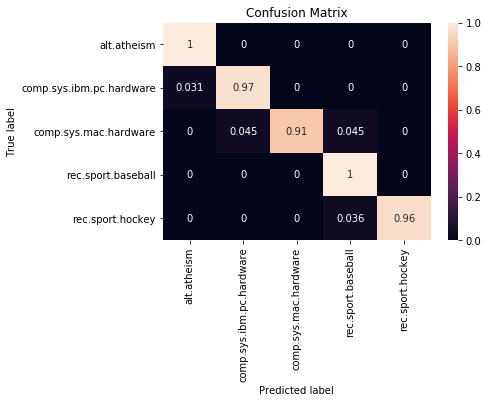

In [33]:
# (1) # Your Code goes here:
gnb = GaussianNB()
X = news_test.drop("class", axis=1)
y = news_test["class"]
gnb.fit(X=X, y=y)
print ("Classification accuracy on test data:", gnb.score(X, y))
print ("______________________________________________________")

tr_pred = gnb.predict(X=X)
cm = confusion_matrix(y, tr_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plot_confusion_matrix(cm_norm, labels, title="Confusion Matrix")

In [49]:
# (2) # Your Code goes here:
count_test = news_test.groupby("class").count()
#count_test #through we find the max one is class 5, and class 4 is 26
print ("Baseline performance: ", 26/count_test["w10_home"].sum())

Baseline performance:  0.203125


(3) ***Your answer goes here:***

The accuracy of the training data and testing data is basically the same. The baseline of the training data and testing data is basically the same. The confusion matrix is also almost identical. From these we can confirm that the data is similar in both sets.

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

Classification accuracy testing data: 0.171875


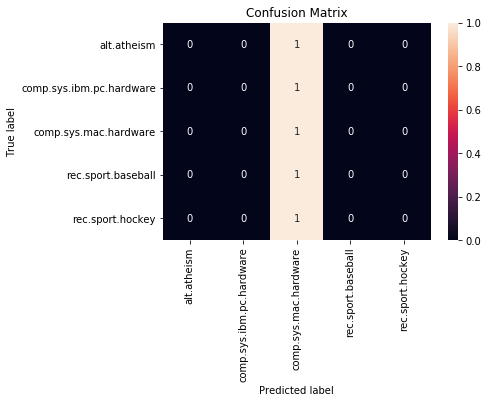

In [56]:
# (1) # Your Code goes here:
# Fit a Gaussian Naive Bayes model 
gnb = GaussianNB()
X = news_raw.drop("class", axis=1)
y = news_raw["class"]
gnb.fit(X=X, y=y)

# Plot a confusion matrix of the performance
tr_pred = gnb.predict(X=news_test.drop("class", axis=1))
cm = confusion_matrix(news_test["class"], tr_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, labels, title="Confusion Matrix")

print ("Classification accuracy testing data:", gnb.score(news_test.drop("class", axis=1), news_test["class"]))

(2) ***Your answer goes here:***

The output is very abnormal and should be distributed diagonally under normal conditions. Because the original outlier is very large, it seriously affects the overall distribution of the data and the size of the value and fianlly attects the model. After the outliers are cleared, the data distribution is normal, and the model based on these data can be more acurrate.

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***

Since the data distribution is quite special, there are large but not many values that do not conform to the normal distribution. So using Gaussian Naive Bayes classifier cannot solve the problem perfectly. I think i will choose Multinomial Naive Bayes classifier.